# Accuracy

In [49]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as mtick
import scipy.integrate as scint
%matplotlib inline

## General one-step methods

* initial value problem
  $$
    \frac{du}{dt}  = f(t,u), \quad u(0) = u_0
  $$
  
  
    
* numerical grid for $t$: $$0=t_0 < t_1 < t_2 < \cdots t_n = T$$

    * uniform grid: $t_k = kh, \quad k=0,\ldots,n$
    
      $$
      u(t_{k+1}) = u(t_k) + \int_{t_k}^{t_{k+1}} f(t,u(t))\, dt, \quad t \in [t_k,t_{k+1}]
      $$
    
    

* one-step method for approximation $u_k \approx u(t_k)$
  $$u_{k+1} = u_k + (t_{k+1}-t_k) \phi(t_k,u_k), \quad k=0,\ldots,n $$.
  
## one-step methods

* *Euler's method:* $$\phi(t,u) = f(t,u)$$
* *Heun's method:* $$\phi(t,u) = \frac{1}{2}(f(t,u) + f(t+h,u+hf(t,u))$$
* *RK4 method:* $$\phi(t,u) = \frac{1}{6}(k_1 + 2k_2+ 2k_3 + k_4)$$
   \begin{align*}
    k_1 & = f(t,u) \\
    k_2 & = f(t+h/2,u+hk_1/2)\\
    k_3 & = f(t+h/2,u+hk_2/2)\\
    k_4 & = f(t+h,u+hk_3)
  \end{align*} 


* these methods are referred to as *explicit methods*
  
       
## example

* IVP
  $$\frac{du}{dt} = -4t(1+t^2)\, u^2, \quad u(0) = 1$$
  
* exact solution (by separation of variables, see ODE course)
  $$u(t) = \frac{1}{(t^2+1)^2}$$

In [50]:
f = lambda t, u : -4*t*(1+t**2)*u**2
phi = f; T = 1.0; n = 8; h = T/n
th = np.linspace(0, T, n+1)
uh = np.zeros(n+1) # Euler
uh[0] = 1.0 
for k,tk  in enumerate(th[:-1]):    
    uh[k+1] = uh[k] + h*phi(tk,uh[k])
tex = np.linspace(0,1,129)
uex = np.zeros(129) # exact
for k,tk in enumerate(tex):
    uex[k] = 1.0/(tk**2+1)**2

-------------------------------------

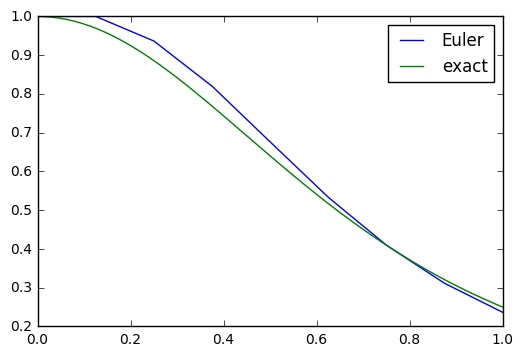

In [51]:
plt.plot(th,uh,label='Euler');plt.plot(tex,uex,label='exact');plt.legend();

## local discretisation error of one-step method

* recall general formula for one-step method
  $$u_{k+1} = u_k + h \phi(t_k,u_k)$$
  
* how well the exact solution satisfies the one-step method
  $$L(t,h) = \frac{u(t+h)-u(t)}{h} - \phi(t,u(t))$$
  
**Definition (consistency):**
* *The one-step method is consistent if* $$\lim_{h\rightarrow 0_+} \sup_t L(t,h) = 0$$

* *The one-step method is consistent of order $p$ if* $$L(t,h) = O(h^p)$$
  *as $h\rightarrow 0$* uniformly in $t$
  
* $L(t,h)$ is $O(h^p)$ means here that there exists a $C>0$ such that
  $$|L(t,h)| \leq Ch^p$$
  
 

 


## Error bound

* error at time $t_k$ -- definition
  $$e_k = u_k - u(t_k)$$


**Proposition**

* Let $T=nh$, $M$ Lipschitz constant for $\phi(t, \cdot)$, 
  $L=\max_{k=0,\ldots,n} L_k$ and
  $e_k$ be the error of the one-step method for $du/dt=f(t, u)$. Then
  $$|e_n| \leq \exp(TM) |e_0| + h L \frac{\exp(TM)-1}{M}$$

* remark: often, $e_0=0$

-----------------------------------------------------

## Test problem

* initial value problem
  \begin{align*}
    \frac{du}{dt} & = \lambda u \\
    u(0) & = u_0
  \end{align*}
  
* Exact solution:
  $$u(t) = u_0e^{\lambda t},  \quad t \in [0,T]$$
  
  

* recall general formula for one-step method
  $$u_{k+1} = u_k + h\phi(t_k,u_k) $$
  
  
  
* How well is 
  $$u_k \approx u(t_k) = u_0e^{\lambda t_k}?, \quad  \text{or} \quad
  u_{k+1} \approx u(t_k+h) = e^{\lambda h}u(t_k) ?$$ 

  


  
  

## Taylor expansion at $t+h$

$$
u(t+h)  = u(t) + h\frac{d u(t)}{dt} + \frac{h^2}{2 !}\frac{d^2 u(t)}{dt^2} + \frac{h^3}{3 !}\frac{d^3 u(t)}{dt^3} + \frac{h^4}{4 !}\frac{d^4 u(t)}{dt^4} + \dots 
  $$
  
* Note that

  $$
  \frac{d^k}{dt^k}u(t) = \lambda^{k}u(t), \quad k = 0, 1, \ldots
  $$

  $$
  u(t+h) = \underbrace{\left(1 + h\lambda + \frac{\left(h\lambda  \right)^2}{2}  + \frac{\left(h\lambda\right)^3}{3 !}  + \frac{\left(h \lambda\right)^4}{4 !} + \dots \right)}_{e^{h\lambda}} u(t)  
  $$

## Forward Eurler 

$$\phi(t_k,u_k) = \lambda u_k$$

$$  
u_{k+1} = u_k +  h\phi(t_k,u_k) = \underbrace{\left(1+ h\lambda\right)}_{ e^{h\lambda} + O(h^{1+1})} u_k
$$

* Truncation error:

  \begin{align*}
  L(t,h) & = \frac{u(t+h)-u(t)}{h} - \lambda u(t)\\
         & = \frac{h}{2}\frac{d^2 u(t)}{dt^2} + O(h^2)
      \end{align*}

-------------------------------

In [52]:
f = lambda u,t, lam = -1 : lam*u
phi = f;
nvec = (1,2,4,8,16,32,64,128,256,512,1024)
error = np.zeros(len(nvec)); bound = np.zeros(len(nvec))
for i,n in enumerate(nvec):
    h = 1.0/n
    th = np.linspace(0,1,n+1)
    uh = np.zeros(n+1) # Euler
    uh[0] = 1.0 
    for k,tk  in enumerate(th[:-1]):
        uh[k+1] = uh[k] + h*phi(uh[k],tk)
    uex = np.exp(-th)
    eh  = uh - uex
    error[i] = abs(eh).max()
    bound[i] = 1/4*(np.e-1)*h

-------------------------------

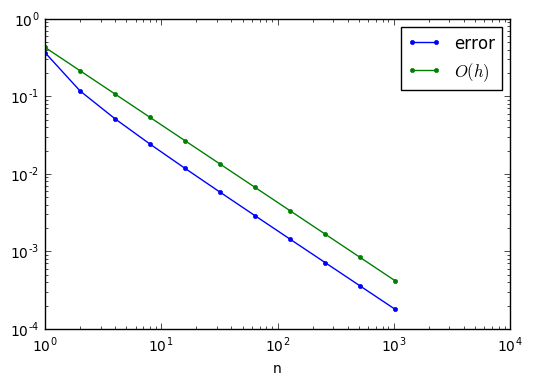

In [53]:
plt.loglog(nvec,error,'.-',label='error')
plt.loglog(nvec,bound,'.-',label='$O(h)$')
plt.xlabel('n')
plt.legend();

## Heun's method

$$\phi(t_k,u_k) = \lambda\left(1 + \frac{h}{2}\lambda\right) u_k$$
  

$$ 
u_{k+1} = u_k +  h\phi(t_k,u_k) = \underbrace{\left(1+ h\lambda + \frac{(h\lambda)^2}{2}\right)}_{ e^{h\lambda} + O(h^{2+1})} u_k
$$

* Truncation error:
  
  \begin{align*}
      L(t,h) & = \frac{u(t+h)-u(t)}{h} - \lambda\left(1 + \frac{h}{2}\lambda\right) u(t)\\
      & =  \frac{h^2}{3 !}\frac{d^3 u(t)}{dt^3} + O(h^3)
      \end{align*}
  

-------------------------------

In [54]:
f = lambda t, u, lam = -1 : lam*u
phi = lambda t, u, h, f=f : 0.5*(f(t,u) \
                    + f(t+h,u+h*f(t,u)))

nvec = (1,2,4,8,16,32,64,128,256,512,1024)
error = np.zeros(len(nvec)); bound = np.zeros(len(nvec))

for i,n in enumerate(nvec):
    h = 1.0/n
    th = np.linspace(0,1,n+1)
    uh = np.zeros(n+1) # Heun
    uh[0] = 1.0 
    for k,tk  in enumerate(th[:-1]):
        uh[k+1] = uh[k] + h*phi(tk, uh[k],h)
    uex = np.exp(-th)
    eh  = uh - uex
    error[i] = abs(eh).max()
    bound[i] = 1/12*(np.e-1)*h**2

----------------------------------

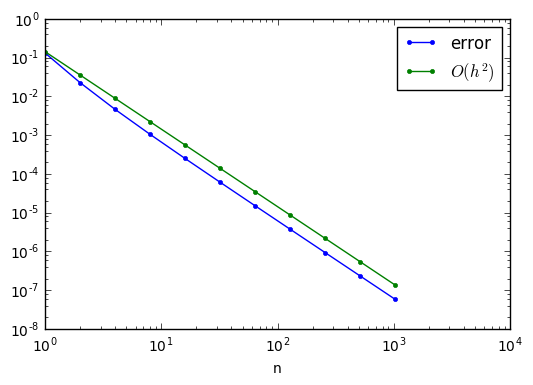

In [55]:
plt.loglog(nvec,error,'.-',label='error')
plt.loglog(nvec,bound,'.-',label='$O(h^2)$')
plt.xlabel('n')
plt.legend();

## RK4 method

  $$
  \phi(t_k,u_k) = \lambda\left(1 + \frac{h\lambda}{2 !} 
  + \frac{(h\lambda)^2}{3 !} + \frac{(h\lambda)^3}{4 !}\right) u_k
  $$
  
  $$ 
   u_{k+1} = u_k +  h\phi(t_k,u_k) = \underbrace{\left(1+ h\lambda + \frac{(h\lambda)^2}{2!} + \frac{(h\lambda)^3}{3!} + \frac{(h\lambda)^4}{4!}\right)}_{ e^{h\lambda} + O(h^{4+1})} u_k
   $$

* Truncation error:
  
  \begin{align*}
  L(t,h) & = \frac{u(t+h)-u(t)}{h} - \phi(t,u(t))\\
         & = \frac{h^4}{5 !}\frac{d^5 u(t)}{dt^3} + O(h^5)
      \end{align*}
  

-------------------------------

In [58]:
f = lambda t, u, lam = -1 : lam*u
def phi(t,u,h,f=f):
    k1 = f(t,u)
    k2 = f(t+h/2,u+h*k1/2)
    k3 = f(t+h/2,u+h*k2/2)
    k4 = f(t+h,u+h*k3)
    return (k1+2*k2+2*k3+k4)/6.0
nvec = (1,2,4,8,16,32,64,128,256,512,1024)
error = np.zeros(len(nvec)); bound = np.zeros(len(nvec))
for i,n in enumerate(nvec):
    h = 1.0/n
    th = np.linspace(0,1,n+1)
    uh = np.zeros(n+1) # RK4
    uh[0] = 1.0 
    for k,tk  in enumerate(th[:-1]):
        uh[k+1] = uh[k] + h*phi(tk, uh[k],h)
    uex = np.exp(-th)
    eh  = uh - uex
    error[i] = abs(eh).max()
    bound[i] = 0.5/120*(np.e-1)*h**4

-------------------------------

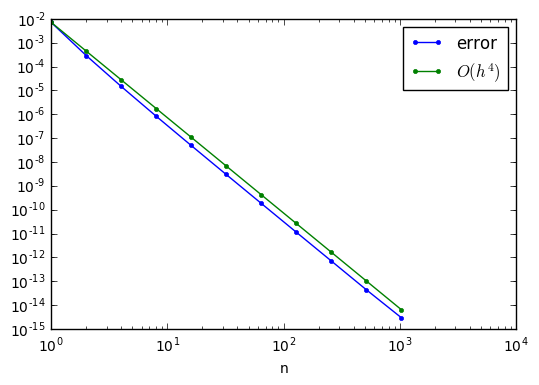

In [57]:
plt.loglog(nvec,error,'.-',label='error')
plt.loglog(nvec,bound,'.-',label='$O(h^4)$')
plt.xlabel('n')
plt.legend();